# Visualise kaolinite titration results

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

## Read data

In [43]:
cacb_data = pd.read_csv('input_data/titration_ca-cb.csv')
logk_data = pd.read_csv('input_data/titration_logK.csv')

In [44]:
cacb_data.head()

,pH,Ca-Cb (mol/L)
0,3.993,0.00276
1,3.998,0.00274
2,4.002,0.00271
3,4.006,0.00269
4,4.131,0.00209


In [45]:
logk_data.head()

,ID,pH,pH STD,mol/g,mol/g STD
0,logK1,9.625277,0.226647,0.000068,1.474800e-05
1,logK2,6.539223,0.132101,0.000023,6.360000e-07
2,logK3,4.706777,0.020141,0.000023,6.360000e-07


Identify logK data by their own indices.

In [46]:
logk_data = logk_data.set_index('ID')
logk_data.head()

,pH,pH STD,mol/g,mol/g STD
ID,,,,
logK1,9.625277,0.226647,0.000068,1.474800e-05
logK2,6.539223,0.132101,0.000023,6.360000e-07
logK3,4.706777,0.020141,0.000023,6.360000e-07


In [47]:
logk_data.dtypes

pH           float64
pH STD       float64
mol/g        float64
mol/g STD    float64
dtype: object

## Draw plot

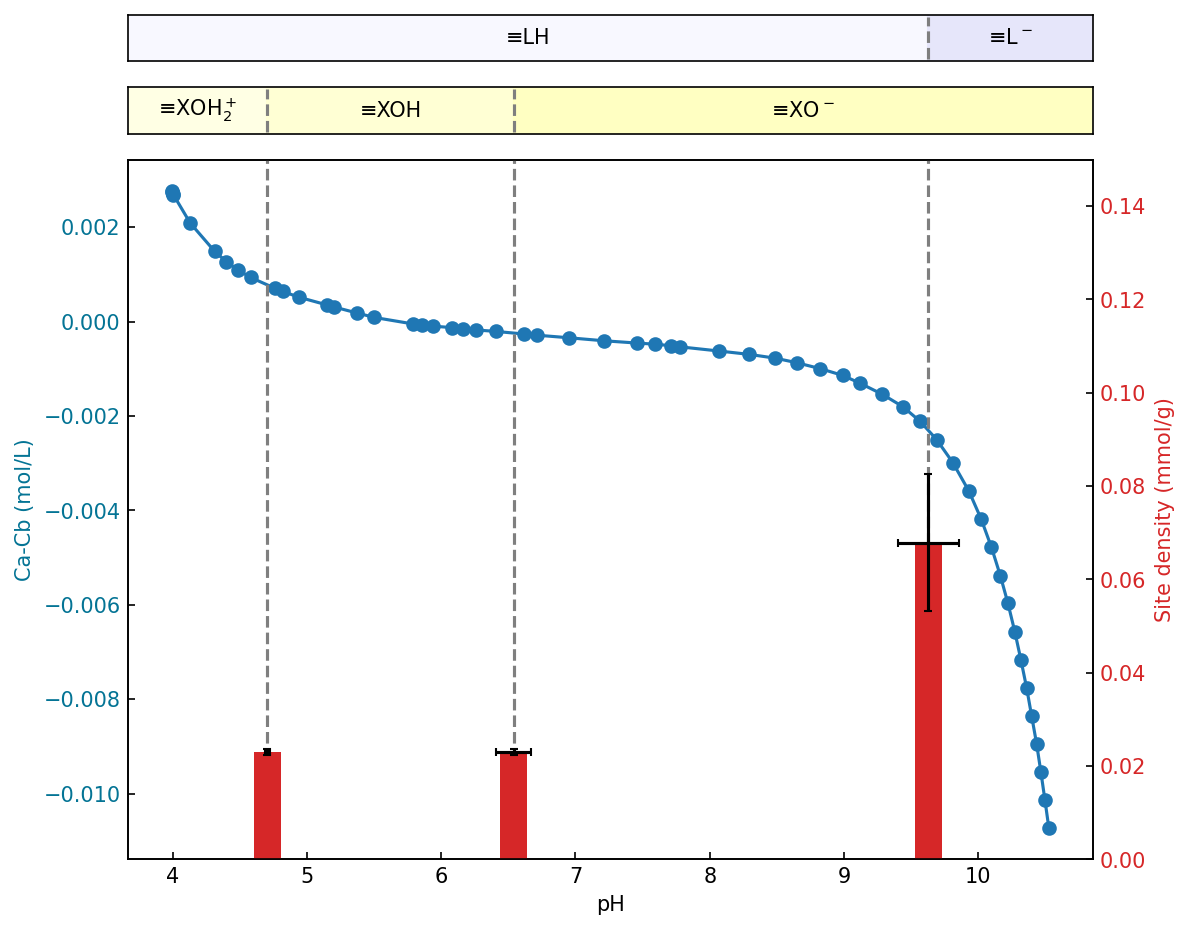

In [63]:
# Canvas, panels
fig, (lhax, xohax, ax1) = plt.subplots(nrows=3,
                                       ncols=1,
                                       figsize=(7,6),
                                       dpi=150,
                                       gridspec_kw = {'height_ratios':[0.4, 0.4, 6]},
                                       sharex = True,
                                      )

for ax in (lhax, xohax):
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.tight_layout(pad=0.5)

# Plot the Ca-Cb data.
cacb = cacb_data.plot.line(y='Ca-Cb (mol/L)', x='pH', ax=ax1, marker='o', color='tab:blue')
ax1.set_ylabel('Ca-Cb (mol/L)', color='xkcd:sea blue')
ax1.tick_params(direction='in')
ax1.tick_params(axis='y', labelcolor='xkcd:sea blue')
ax1.get_legend().remove()

# Plot the logK data.
# add second y axis
ax2 = ax1.twinx()
logk = ax2.bar(x = logk_data['pH'],
               height = logk_data['mol/g'] * 1000,
               width=0.2,
               color='tab:red',
               label='pK',
               yerr=logk_data['mol/g STD'] * 1000,
               xerr=logk_data['pH STD'],
               capsize=2,
              )
ax2.tick_params(direction='in', labelcolor='tab:red')
ax2.set_ylim(top=0.15)
ax2.set_ylabel('Site density (mmol/g)', color='tab:red')

# Species of surface functional groups
axlines = ax2.vlines(x=logk_data['pH'], ymin=0, ymax=1, linestyles='dashed', zorder=0.1, color='tab:gray')

ax1.set_xlim(ax1.get_xlim())

lhaxlines = lhax.vlines(x=logk_data['pH'].head(1), ymin=0, ymax=1, linestyles='dashed', color='tab:gray')
xohaxlines = xohax.vlines(x=logk_data['pH'].tail(2), ymin=0, ymax=1, linestyles='dashed', color='tab:gray')

lhaxspan1 = lhax.axvspan(xmin=ax1.get_xlim()[0], xmax=logk_data['pH']['logK1'], color='ghostwhite')
lhtext = lhax.text(s='≡LH',
                   x = ax1.get_xlim()[0] + (logk_data['pH']['logK1'] - ax1.get_xlim()[0]) / 2,
                   y = 0.5,
                   horizontalalignment = 'center',
                   verticalalignment = 'center',
                  )
lhaxspan2 = lhax.axvspan(xmin=logk_data['pH']['logK1'], xmax=ax1.get_xlim()[1], color='lavender')
lminustext = lhax.text(s='≡L$^-$',
                       x = logk_data['pH']['logK1'] + (ax1.get_xlim()[1] - logk_data['pH']['logK1']) / 2,
                       y = 0.5,
                       horizontalalignment = 'center',
                       verticalalignment = 'center',
                      )

xohaxspan1 = xohax.axvspan(xmin=ax1.get_xlim()[0], xmax=logk_data['pH']['logK3'], color='xkcd:off white')
xoh2text = xohax.text(s='≡XOH$_2^+$',
                      x = ax1.get_xlim()[0] + (logk_data['pH']['logK3'] - ax1.get_xlim()[0]) / 2,
                      y = 0.5,
                      horizontalalignment = 'center',
                      verticalalignment = 'center',
                     )
xohaxspan2 = xohax.axvspan(xmin=logk_data['pH']['logK3'], xmax=logk_data['pH']['logK2'], color='xkcd:eggshell')
xohtext = xohax.text(s='≡XOH',
                     x = logk_data['pH']['logK3'] + (logk_data['pH']['logK2'] - logk_data['pH']['logK3']) / 2,
                     y = 0.5,
                     horizontalalignment = 'center',
                     verticalalignment = 'center',
                    )
xohaxspan3 = xohax.axvspan(xmin=logk_data['pH']['logK2'], xmax=ax1.get_xlim()[1], color='xkcd:cream')
xominustext = xohax.text(s='≡XO$^-$',
                         x = logk_data['pH']['logK2'] + (ax1.get_xlim()[1] - logk_data['pH']['logK2']) / 2,
                         y = 0.5,
                         horizontalalignment = 'center',
                         verticalalignment = 'center',
                        )

## Save figure

In [56]:
plt.rcParams['svg.fonttype'] = 'none'
fig.savefig('figures/Figure S6.png', bbox_inches='tight', dpi=350)